In [544]:
# Vamos a realizar una prueba solo son la prediccion de latitudes
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
#Cargamos el Dataset
file_path = "dataset/dataset.csv"
df = pd.read_csv(file_path)


In [545]:
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour']
x = df[X_columns]
x.loc[:,'fc'] = x['fc']/1E6
lat_columns = [f'lat_{i}' for i in range(1,101)]
y_latitudes = df[lat_columns]


In [546]:
x_train,x_test,y_train,y_test = train_test_split(x,y_latitudes,test_size=0.2,random_state=42)

In [ ]:
l2_reg = 0.001
inputs = Input(shape=(10,))
encoded = Dense(16, activation='relu',kernel_regularizer=l2(l2_reg))(inputs)  # Compresión 8 V3 16 n 
# decoded = Dense(16, activation='relu',kernel_regularizer=l2(l2_reg))(encoded) #V3
encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(80, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(90, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)

decoded = Dense(100, activation='linear',kernel_regularizer=l2(l2_reg), name = 'latitudes_output')(encoded)  # Reconstrucción a 100 puntos

autoencoder_lat = Model(inputs, decoded)
autoencoder_lat.compile(optimizer = 'adamW', loss='mse')
autoencoder_lat.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_49 (InputLayer)     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_281 (Dense)               │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_282 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_283 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_284 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_285 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_286 (Dense)               │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_287 (Dense)               │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latitudes_output (Dense)        │ (None, 100)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,638 (115.77 KB)

 Trainable params: 29,638 (115.77 KB)

 Non-trainable params: 0 (0.00 B)

In [548]:
# Entrenamiento 
print(len(x_train))
history = autoencoder_lat.fit(x_train,y_train,
                          epochs=800,
                          batch_size=90, 
                          validation_split = 0.2)  

4104
Epoch 1/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1648.7373 - val_loss: 35.0217
Epoch 2/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3734 - val_loss: 2.9280
Epoch 3/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5439 - val_loss: 1.6215
Epoch 4/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7322 - val_loss: 1.4043
Epoch 5/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4941 - val_loss: 1.2527
Epoch 6/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2752 - val_loss: 1.1581
Epoch 7/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1668 - val_loss: 1.1177
Epoch 8/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1359 - val_loss: 1.1553
Epoch 9/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1579 - val_loss: 1.1072
Epoch 10/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1884 - val_loss: 1.0698
Epoch 11/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0967 - val_loss: 1.0492
Epoch 12/800
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

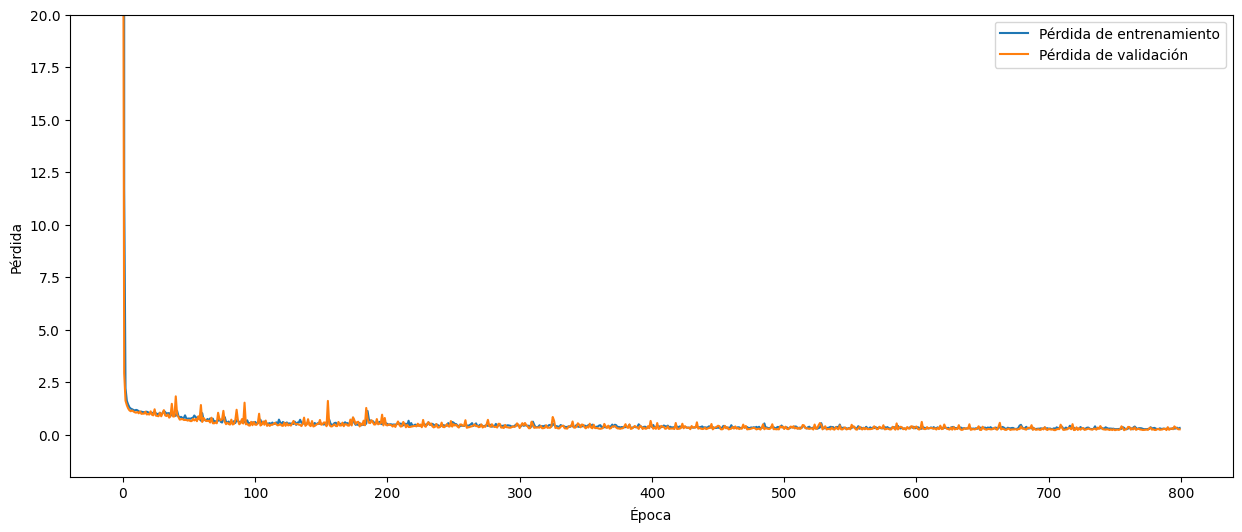

In [549]:
# Graficar la función de pérdida durante el entrenamiento
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.ylim(-2,20)
plt.legend()
plt.show()

In [550]:
# Evaluar el modelo en los datos de test
loss = autoencoder_lat.evaluate(x_test, y_test)
print(f'Pérdida en datos de Test: {loss}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.2611
Pérdida en datos de Test: 0.2577964961528778


In [551]:
# Realizar predicciones con el conjunto de prueba
predicciones = autoencoder_lat.predict(x_test)

# Mostrar una predicción
print(type(predicciones))
print(predicciones)  # Muestra los primeros 100 puntos predichos

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
<class 'numpy.ndarray'>
[[-41.96722  -41.852036 -41.97758  ... -41.810974 -41.79836  -41.824974]
 [-42.286816 -42.216846 -42.307316 ... -41.396484 -41.414707 -41.4135  ]
 [-41.914528 -41.84254  -41.95734  ... -41.897064 -41.880573 -41.914047]
 ...
 [-42.051235 -42.019802 -42.095497 ... -41.294914 -41.351616 -41.31548 ]
 [-42.05892  -42.019672 -42.10495  ... -40.61451  -40.610806 -40.533527]
 [-41.86727  -41.9594   -41.900085 ... -40.501404 -40.488647 -40.493   ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


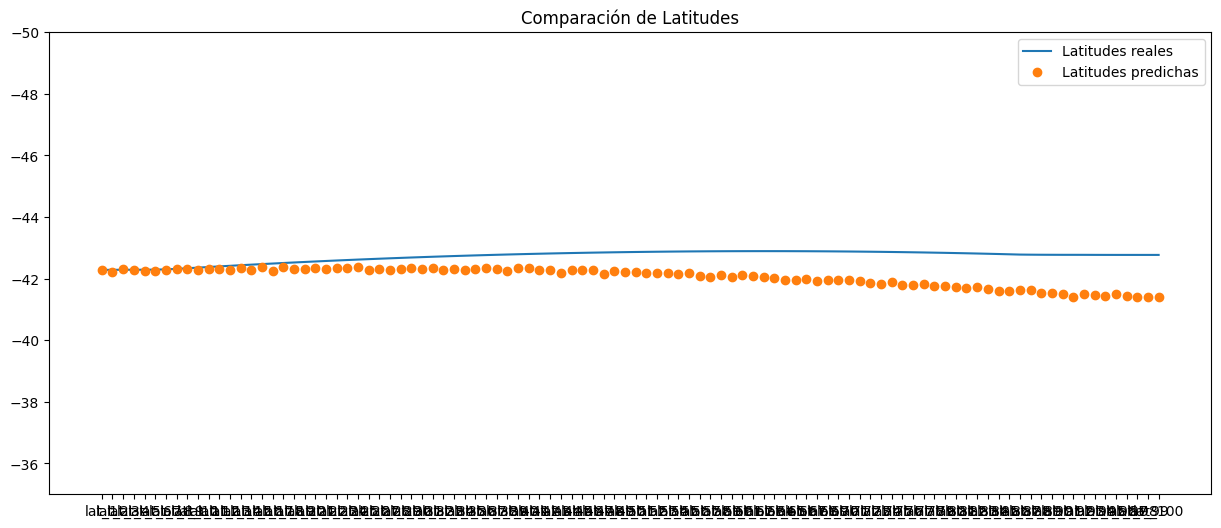

In [552]:

idx = 1  # Elegir una muestra para comparar

# Predicción de una muestra
y_pred = autoencoder_lat.predict(np.expand_dims(x_test.iloc[idx], axis=0))

# Valores reales de esa muestra
y_true = y_test.iloc[idx]
y_true = y_true[:100]
y_pred = y_pred[0,0:100]
print(type(y_pred), type(y_true))

##Graficamos 
# Latitudes
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Latitudes reales')
plt.plot(y_pred, label='Latitudes predichas', linestyle = 'None',marker='o')
plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Latitudes')
plt.legend()
plt.show()

In [553]:
save_model = True

if save_model == True:
  autoencoder_lat.save('modelos_entrenamiento/modelos_latitudes/mod_lat_800_70_V3.keras')

In [554]:
# Pérdida en datos de Test: 0.2968800961971283 / mod_lat_600_100_V2 /Adam
# Pérdida en datos de Test: 0.22927239537239075 / mod_lat_600_100_V1 / Adam
# Pérdida en datos de Test: 0.2275295853614807 / mod_lat_700_100_V2 / Adam
# Pérdida en datos de Test: 0.2162327915430069 /mod_lat_700_70_V1 / Adam
# Pérdida en datos de Test: 0.19534869492053986 / mod_lat_800_70_V3 / Adam